In [1]:
from transformers import Qwen3VLForConditionalGeneration, AutoProcessor
from IPython.display import display, Markdown

model = Qwen3VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen3-VL-8B-Instruct", dtype="auto", device_map="auto"
)

processor = AutoProcessor.from_pretrained("Qwen/Qwen3-VL-8B-Instruct")

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-12-16 09:22:55.344712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-16 09:22:58.803653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading checkpoint shards: 100%|██████████| 4/4 [03:26<00:00, 51.53s/it]
'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 2be72f3b-8398-4965-b15a-35307fd2d440)')' thrown while requesting HEAD https://huggingface.co/Qwen/Qwen3-VL-8B-Instruct/resolve/main/generation_confi

In [2]:
def generate_description(prompt_text, image_path, max_new_tokens):

    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image_path,
                },
                {"type": "text", "text": prompt_text},
            ],
        }
    ]

    inputs = processor.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_dict=True,
        return_tensors="pt"
    )
    inputs = inputs.to(model.device)

    generated_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    
    return output_text[0] if output_text else ""

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Table scene

In [4]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the table.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here is a comprehensive scan of every object on the table in the image:

1.  **Calendar (Wall Mounted)**
    *   Object type/class: Wall Calendar
    *   Primary color: Purple and White
    *   Size estimate: Large
    *   Position relative to other objects: Center-top of the image, mounted on the wall above the table.

2.  **Desk Lamp**
    *   Object type/class: Desk Lamp
    *   Primary color: White
    *   Size estimate: Medium
    *   Position relative to other objects: Left side of the table, angled towards the center.

3.  **Battery**
    *   Object type/class: Battery
    *   Primary color: Black and Silver
    *   Size estimate: Small
    *   Position relative to other objects: On the left side of the table, near the base of the lamp.

4.  **Battery**
    *   Object type/class: Battery
    *   Primary color: Black and Silver
    *   Size estimate: Small
    *   Position relative to other objects: On the left side of the table, next to the first battery.

5.  **Book**
    *   Object type/class: Book
    *   Primary color: Blue and White
    *   Size estimate: Medium
    *   Position relative to other objects: Center of the table, lying flat.

6.  **Pen**
    *   Object type/class: Pen
    *   Primary color: Blue
    *   Size estimate: Small
    *   Position relative to other objects: To the right of the book, near the mouse.

7.  **Mouse**
    *   Object type/class: Computer Mouse
    *   Primary color: Black
    *   Size estimate: Small
    *   Position relative to other objects: To the right of the book, next to the pen.

8.  **Wire**
    *   Object type/class: Wire
    *   Primary color: Black
    *   Size estimate: Medium
    *   Position relative to other objects: Running from the lamp base to the center of the table.

9.  **Wire**
    *   Object type/class: Wire
    *   Primary color: Black
    *   Size estimate: Medium
    *   Position relative to other objects: Running from the center of the table to the right side.

10. **Phone**
    *   Object type/class: Smartphone
    *   Primary color: Black
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, on top of some papers.

11. **Fan**
    *   Object type/class: Fan
    *   Primary color: White
    *   Size estimate: Large
    *   Position relative to other objects: Right side of the table, leaning against the wall.

12. **Water Bottle**
    *   Object type/class: Water Bottle
    *   Primary color: Black
    *   Size estimate: Medium
    *   Position relative to other objects: On the far right side of the table, next to the fan.

13. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, under the phone.

14. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, next to the phone.

15. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, under the fan.

16. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, next to the fan.

17. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, under the fan.

18. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table, next to the fan.

19. **Paper**
    *   Object type/class: Paper
    *   Primary color: White
    *   Size estimate: Small
    *   Position relative to other objects: On the right side of the table,

In [5]:
prompt_text = """
    You are an assistant analyzing a photo of a tabletop. Your task is to list every visible object **on the table surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the table]

    Rules:
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.
    3. Include very small items (e.g. pen, key, coin) if visible.
    4. If an object is partially hidden but identifiable, include it.
    5. Do not describe position relative to other objects (e.g. "next to cup") — use absolute position on table (left/center/right).
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

- calendar, purple and white, large, center part of the table
- desk lamp, white, medium, left part of the table
- batteries, black and green, small, left part of the table
- notebook, blue and white, medium, center part of the table
- pen, blue, small, center part of the table
- mouse, black, small, right part of the table
- phone, black, medium, right part of the table
- fan, white, large, right part of the table
- water bottle, silver, medium, right part of the table
- charger, white, small, right part of the table
- cable, black, medium, center part of the table

In [9]:
prompt_text = """
    You are analyzing an image of a table with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Cup
    Notebook
    Pen
    Calculator
    Thermos
    Mouse
    Calendar
    Lamp
    Clock
    Two markers (green and pink)
    Power bank / charging block
    Knife
    Fan

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Based on a careful examination of the image, here is a list of the objects that are actually visible, along with those that are missing or not visible:

**Objects Present in the Scene:**

- ✅ **Notebook** — A blue-covered notebook labeled “Collegeblok” is visible in the foreground.
- ✅ **Pen** — A blue pen is lying on the table near the mouse.
- ✅ **Thermos** — A dark-colored thermos bottle is on the right side of the table.
- ✅ **Mouse** — A black computer mouse is visible near the notebook.
- ✅ **Calendar** — A large wall calendar for 2023 is hanging on the wall behind the table.
- ✅ **Lamp** — A white desk lamp with an adjustable arm is on the left side of the table.
- ✅ **Fan** — A white oscillating fan is on the right side of the table.
- ✅ **Power bank / charging block** — A white power bank or charging block with cables is visible on the table near the fan.
- ✅ **Two markers (green and pink)** — Two small marker-like objects (one green, one pink) are visible on the table near the notebook.

**Objects NOT Present (Missing) in the Scene:**

- ❌ **Cup** — No cup is visible.
- ❌ **Calculator** — No calculator is visible.
- ❌ **Clock** — No clock is visible.

---

**Summary:**

**Visible:** Notebook, Pen, Thermos, Mouse, Calendar, Lamp, Fan, Power bank / charging block, Two markers (green and pink)

**Missing:** Cup, Calculator, Clock

In [10]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a container, used for storing drinks? (If yes name it — if not, write “No”)  
    2. Is there a phone on the table? (Answer: Yes / No)  
    3. Is there a device for a laptop on the table? (Answer: Yes / No)  
    4. What black items are visible on the table? (List them — if none, write “None”)  
    5. Is there a writing instrument on the table? (If yes name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

1. Yes — water bottle  
2. Yes  
3. Yes  
4. Mouse, cable, phone (if considering phone as device) — but phone is not a laptop device, so: Mouse, cable  
5. Yes — pen

## Bed scene

In [11]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the bed.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here are all the objects detected on the bed:

-   **Object type/class**: Laptop
    -   **Primary color**: Black
    -   **Size estimate**: Medium
    -   **Position relative to other objects**: Center-left, resting on the bedspread, adjacent to the pillows on the left and the pink blanket on the right.

-   **Object type/class**: Pillow
    -   **Primary color**: Blue-green (teal)
    -   **Size estimate**: Medium
    -   **Position relative to other objects**: Left side, positioned at the head of the bed, adjacent to the white pillow behind it.

-   **Object type/class**: Pillow
    -   **Primary color**: White
    -   **Size estimate**: Medium
    -   **Position relative to other objects**: Behind the blue-green pillow, slightly to its right, at the head of the bed.

-   **Object type/class**: Blanket
    -   **Primary color**: Pink
    -   **Size estimate**: Large
    -   **Position relative to other objects**: Right side, covering the center and right portion of the bed, partially folded, adjacent to the laptop on the left and the headboard area on the right.

-   **Object type/class**: Bedspread
    -   **Primary color**: Blue-green (teal) with a light pattern
    -   **Size estimate**: Large
    -   **Position relative to other objects**: Covers the entire surface of the bed, underneath the pillows, laptop, and blanket. It is visible on the left side, under the pillows, and on the right side, under the blanket.

In [12]:
prompt_text = """
    You are an assistant analyzing a photo of a bed. Your task is to list every visible object **on the bed surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the bed]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  
    5. Do not describe position relative to other objects (e.g. "next to lamp") — use absolute position on table (left/center/right).

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

- laptop, black, medium, center part of the bed
- pillow, green, large, left part of the bed
- pillow, white, medium, left part of the bed
- blanket, pink, large, right part of the bed
- small white object, white, small, center part of the bed

In [13]:
prompt_text = """
    You are analyzing an image of a bed with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Bottle
    Laptop
    Earbuds / AirPods case
    Phone
    Two pillows
    Blanket


Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Based on a careful examination of the image, here is the list of objects that are present versus those that are missing:

**Objects Present in the Scene:**
- Laptop ✅ (Yes, a black laptop is open on the bed)
- Two pillows ✅ (Yes, there is a large green patterned pillow and a smaller white pillow behind it)
- Blanket ✅ (Yes, a pink blanket with green leaf-like patterns is draped over part of the bed)

**Objects NOT Visible (Missing):**
- Bottle ❌
- Earbuds / AirPods case ❌
- Phone ❌

The laptop, two pillows, and blanket are clearly visible. The bottle, earbuds case, and phone are not present in the image.

In [14]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a device on the bed that can be used to watch a movie? (If yes, name it — if not, write “No”)  
    2. Are there headphones on the bed? (Answer: Yes / No)  
    3. What green items are visible on the bed? (List them — if none, write “None”)  
    4. Is there an object in the image that can emit light? (If yes, name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

1. Yes, laptop
2. No
3. None
4. Yes, lamp

## Wardrobe scene

In [15]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item in the wardrobe.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here is the object detection report for the wardrobe image:

1. Object type/class: Wardrobe
   Primary color: Yellow
   Size estimate: Large
   Position relative to other objects: This is the container for all other objects, forming the background and structure of the image.

2. Object type/class: Clothing (Jacket)
   Primary color: Black
   Size estimate: Large
   Position relative to other objects: Hanging on the right side of the wardrobe, in the center of the image, dominating the visual space.

3. Object type/class: Clothing (Plaid Shirt)
   Primary color: Red, white, and black (plaid pattern)
   Size estimate: Medium
   Position relative to other objects: Hanging behind the black jacket, partially visible, adjacent to the jacket on the left.

4. Object type/class: Clothing (Dark Blue Pants or Skirt)
   Primary color: Dark Blue
   Size estimate: Medium
   Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

5. Object type/class: Hanger
   Primary color: Light Wood (natural wood tone)
   Size estimate: Small
   Position relative to other objects: Multiple hangers are visible on the metal rod; they are positioned at the top of the wardrobe, holding the clothing items.

6. Object type/class: Metal Rod
   Primary color: Silver
   Size estimate: Medium
   Position relative to other objects: Horizontally positioned across the top of the wardrobe, supporting the hangers.

7. Object type/class: Plastic Storage Bin
   Primary color: Blue
   Size estimate: Medium
   Position relative to other objects: Located at the bottom of the wardrobe, on the left side, underneath the hanging clothes.

8. Object type/class: Lid (on Storage Bin)
   Primary color: White
   Size estimate: Small
   Position relative to other objects: Placed on top of the blue storage bin, slightly askew.

9. Object type/class: Clothing (Dark Blue Shirt or Jacket)
   Primary color: Dark Blue
   Size estimate: Medium
   Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

10. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

11. Object type/class: Clothing (Dark Blue Shirt or Jacket)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

12. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

13. Object type/class: Clothing (Dark Blue Shirt or Jacket)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

14. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

15. Object type/class: Clothing (Dark Blue Shirt or Jacket)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

16. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

17. Object type/class: Clothing (Dark Blue Shirt or Jacket)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

18. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

19. Object type/class: Clothing (Dark Blue Shirt or Jacket)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and jacket.

20. Object type/class: Clothing (Dark Blue Pants or Skirt)
    Primary color: Dark Blue
    Size estimate: Medium
    Position relative to other objects: Hanging on the left side, partially visible behind the plaid shirt and

In [16]:
prompt_text = """
    You are an assistant analyzing a photo of a wardrobe. Your task is to list every visible object **inside a wardrobe only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

- jacket, black, large
- shirt, plaid, medium
- pants, blue, large
- storage bin, blue, medium

In [17]:
prompt_text = """
    You are analyzing an image of a wardrobe with various personal items placed in it. Based on the provided description, the following objects should be present in the scene:
  
    Jacket
    Scotch
    Hat
    Shirt
    Shoes
    Pants
    Hangers
    Socks
    Storage box
    Plate
    Fork

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Based on a careful examination of the image, here is the list of objects that are visible versus those that are not:

**Objects Present in the Scene:**

- Jacket (a black puffer jacket is prominently hanging)
- Shirt (a plaid shirt is visible underneath the jacket)
- Pants (a pair of dark pants is visible hanging below the shirt)
- Hangers (multiple hangers are visible holding the clothes)
- Storage box (a blue plastic storage box is visible at the bottom)
- Plate (a white plate is visible inside the storage box)

**Objects NOT Visible in the Scene:**

- Scotch (not visible)
- Hat (not visible)
- Shoes (not visible)
- Socks (not visible)
- Fork (not visible)

The image clearly shows the jacket, shirt, pants, hangers, storage box, and plate. None of the other listed items — scotch, hat, shoes, socks, or fork — are visible in the image.

In [18]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. How many hangers are visible inside the wardrobe? (If none, write “0”)  
    2. Are there any items inside a storage bin? (Answer: Yes / No)  
    3. Is there any item with a plaid pattern? (Answer: Yes / No)  
    4. What black items are visible on the picture? (List them — if none, write “None”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

1. 3
2. Yes
3. Yes
4. Jacket

## Additional experiments

Parsed points:  [[0.472, 0.808], [0.635, 0.802], [0.477, 0.816], [0.698, 0.812], [0.668, 0.816], [0.688, 0.617], [0.767, 0.663], [0.779, 0.702], [0.877, 0.668], [0.226, 0.697], [0.212, 0.685], [0.138, 0.658], [0.147, 0.685], [0.338, 0.594], [0.408, 0.584], [0.779, 0.448], [0.384, 0.239], [0.642, 0.597]]
Parsed descriptions:  ['blue pen', 'black pen', 'large black notebook', 'black computer mouse', 'black charging cable', 'black smartphone', 'white power adapter', 'blue and white notebook', 'black water bottle', 'black and green battery', 'black and green battery', 'white desk lamp', 'black cable', 'small golden figurine', 'small golden figurine', 'white electric fan', 'purple and white calendar', 'yellow notebook']


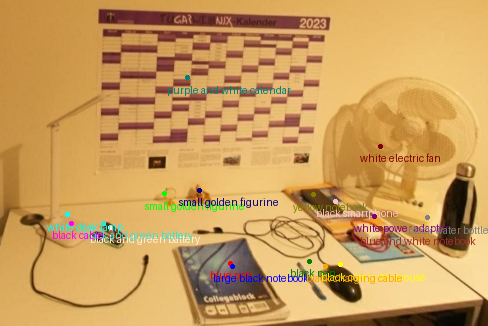

In [22]:
from utils import plot_points

prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output point coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    POINT PLACEMENT:
    - Place point at the visual center of each object
    - For irregular shapes, use the centroid
    - For objects with handles/extensions, focus on main body

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"point_2d": [x, y], "label": "descriptive_name"}
    3. x and y MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its center

    EXAMPLE OUTPUT:
    ```json
    [
        {"point_2d": [0.324, 0.567], "label": "ceramic coffee mug"},
        {"point_2d": [0.412, 0.589], "label": "metal wrench"},
        {"point_2d": [0.538, 0.621], "label": "yellow pencil"},
        {"point_2d": [0.712, 0.489], "label": "smartphone"},
        {"point_2d": [0.823, 0.534], "label": "stack of papers"},
        {"point_2d": [0.456, 0.723], "label": "plastic water bottle"},
        {"point_2d": [0.389, 0.678], "label": "small silver screw"},
        {"point_2d": [0.645, 0.712], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_points(image_path, result)

Parsed bboxes:  [[0.364, 0.693, 0.594, 0.966], [0.607, 0.747, 0.676, 0.867], [0.663, 0.794, 0.744, 0.907], [0.614, 0.567, 0.728, 0.662], [0.598, 0.546, 0.744, 0.615], [0.716, 0.643, 0.823, 0.727], [0.744, 0.652, 0.873, 0.756], [0.619, 0.546, 0.744, 0.615], [0.898, 0.492, 0.984, 0.771], [0.0, 0.638, 0.313, 0.966], [0.184, 0.667, 0.268, 0.734], [0.214, 0.667, 0.283, 0.727], [0.111, 0.321, 0.268, 0.734], [0.712, 0.276, 0.984, 0.676]]
Parsed descriptions:  ['large blue notebook', 'blue pen', 'black computer mouse', 'black smartphone', 'white charging cable', 'white power adapter', 'blue and white instruction manual', 'black smartphone', 'black metal water bottle', 'black charging cable', 'black and green battery', 'black and silver battery', 'white desk lamp', 'white electric fan']


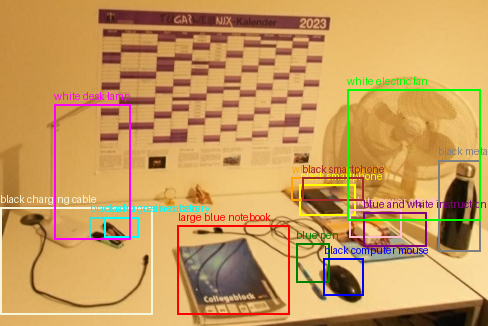

In [23]:
from utils import plot_bboxes


prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output bounding box coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    BOUNDING BOX PLACEMENT:
    - Define box as [x_min, y_min, x_max, y_max] — top-left to bottom-right corners
    - Cover the entire visible extent of the object on the table
    - For partially visible objects, estimate full bounding box based on visible portion
    - For stacked/overlapping objects, prioritize the most visible one

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"bbox_2d": [x_min, y_min, x_max, y_max], "label": "descriptive_name"}
    3. All coordinates MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its full bounding box
    - DO NOT include wall calendars, figurines, or hanging decorations

    EXAMPLE OUTPUT:
    ```json
    [
        {"bbox_2d": [0.324, 0.567, 0.389, 0.621], "label": "ceramic coffee mug"},
        {"bbox_2d": [0.412, 0.589, 0.478, 0.635], "label": "metal wrench"},
        {"bbox_2d": [0.538, 0.621, 0.592, 0.654], "label": "yellow pencil"},
        {"bbox_2d": [0.712, 0.489, 0.789, 0.542], "label": "smartphone"},
        {"bbox_2d": [0.823, 0.534, 0.912, 0.598], "label": "stack of papers"},
        {"bbox_2d": [0.456, 0.723, 0.521, 0.789], "label": "plastic water bottle"},
        {"bbox_2d": [0.389, 0.678, 0.432, 0.712], "label": "small silver screw"},
        {"bbox_2d": [0.645, 0.712, 0.723, 0.756], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_bboxes(image_path, result)

In [21]:
prompt_text = """
    You are an object detection and description assistant.
    
    IMAGE DESCRIPTION:
    - The image shows a table with multiple objects
    - Each object is marked with a visible red dot at its center
    - The red dots are your guide to locate ALL objects

    TASK:
    1. For EVERY red dot on the image, identify the corresponding object
    2. For each object, provide exactly 4 attributes in this format:
       [Object name], [main color], [size: small/medium/large], [position: left/center/right part of the table]

    DETECTION RULES:
    1. **Red dot priority**: Only process objects with red dots. Ignore objects without dots.
    2. **Object identification**: Determine the most specific name for each object (e.g., "screwdriver" not just "tool")
    3. **Color determination**: Identify the dominant/main color of the object
    4. **Size classification**:
       - Small: fits within 5% of image width
       - Medium: 5-15% of image width  
       - Large: >15% of image width
    5. **Position reference**: Use "table" as reference frame:
       - Left: left 1/3 of table area
       - Center: middle 1/3 of table area
       - Right: right 1/3 of table area

    OUTPUT FORMAT:
    - One line per object
    - Exactly: [Name], [Color], [Size], [Position]
    - Example: "Phillips screwdriver, red, medium, left part of the table"
    - List ALL objects in consistent order (e.g., left to right, top to bottom)

    SPECIAL CASES:
    1. **Dense clusters**: If dots are very close, analyze each separately
    2. **Overlapping objects**: Use the red dot position to determine which object
    3. **Uncertain objects**: Use best descriptive name (e.g., "electronic component" if unsure)
    4. **Multiple colors**: Choose the most prominent/visible color

    START DETECTION NOW. Return only the list, no explanations.
"""
image_path = "/home/jupyter/project/experiments/table_pointed.png"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Desk lamp, white, medium, left part of the table
Battery, black, small, left part of the table
Battery, black, small, left part of the table
Calendar, purple, large, center part of the table
Fan, white, large, right part of the table
Water bottle, black, medium, right part of the table
Book, blue, medium, center part of the table
Mouse, black, small, center part of the table
Pen, blue, small, center part of the table
Mouse pad, blue, small, center part of the table
Notebook, blue, medium, center part of the table
Cable, black, medium, center part of the table